## 2.1 Reading the prepared apple news headline data 

In [1]:
# data analysis library: pandas
import pandas as pd

# Reading the prepared apple news headline data
apple_headlines_data = pd.read_csv('aapl_news_headline.csv', parse_dates=True)

apple_headlines_data.head()

,news_headline,time_stamp,URL,sentiment_score,sentiment_class
0,carl icahn ups apple stake to $3 billion,2014-01-27 23:47:47,http://money.cnn.com/2014/01/22/technology/app...,0.0000,0
1,the apple mac at 30: see the evolution of a…,2014-01-27 23:47:47,http://feeds.wired.com/c/35185/f/661457/s/3656...,0.0000,0
2,apple engineers who brought mac to life get r...,2014-01-27 23:47:47,http://gadgets.ndtv.com/shortlink.aspx?article...,0.0000,0
3,apple takes a fresh bite into china s market,2014-01-27 23:47:47,/id/101340364,0.3182,1
4,icahn takes another $500 million bite out of a...,2014-01-27 23:47:47,"/business/sns-rt-us-apple-icahn-20140122,0,515...",0.0000,0


### Filtering the necessary column

In [4]:
# filtering the necessary columns
apple = apple_headlines_data[['time_stamp', 'news_headline', 'sentiment_class', 'sentiment_score']]
apple.tail()

,time_stamp,news_headline,sentiment_class,sentiment_score
42278,2016-12-31 08:15:02,"apple 'blamed' for car crash, family sues company",-1,-0.7003
42279,2016-12-31 08:45:01,family sues apple for losing their daughter in...,-1,-0.6486
42280,2016-12-31 11:15:01,apple said to seek lower taxes to start manufa...,-1,-0.2960
42281,2016-12-31 14:45:01,texas family blame apple's facetime in suit ov...,-1,-0.8225
42282,2016-12-31 19:45:01,you don???t trust authority just because it we...,1,0.6298


In [5]:
# checking the type of time_stamp
type(apple['time_stamp'].iloc[0])

str

In [6]:
# changing the type of time_stamp column from string format to datetime format
apple['time_stamp'] = pd.to_datetime(apple['time_stamp'], utc=True)
type(apple['time_stamp'].iloc[0])

<ipython-input-6-e4eebb377e71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['time_stamp'] = pd.to_datetime(apple['time_stamp'], utc=True)


pandas._libs.tslibs.timestamps.Timestamp

In [7]:
# sorting the apple sentiment dataframe according to the time_stamp
apple.sort_values(by='time_stamp', inplace=True)
apple.head()

<ipython-input-7-8b9b94555588>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple.sort_values(by='time_stamp', inplace=True)


,time_stamp,news_headline,sentiment_class,sentiment_score
0,2014-01-27 23:47:47+00:00,carl icahn ups apple stake to $3 billion,0,0.0
34,2014-01-27 23:47:47+00:00,"apple, google eye big pie in education space",0,0.0
35,2014-01-27 23:47:47+00:00,apple ipad air vs samsung galaxy note 10.1 vs ...,0,0.0
36,2014-01-27 23:47:47+00:00,floor tiles with apple logo sold as real ipads,0,0.0
37,2014-01-27 23:47:47+00:00,fixing cracked glass at apple s 5th avenue sto...,0,0.0


## 2.2 Preparation of daily opening trading timestamp for news headlines

In [ ]:
'''
The code contains the preparation of daily opening trading timestamp for news headline.
This code is adapted from a Medium post from Flavio Valerio Roncagliolo on 29/07/2021.

Medium Post here:
https://medium.com/analytics-vidhya/sentiment-analysis-with-vader-and-algorithmic-trading-d7bef3c29c4b

'''

In [11]:
# importing datetime and BDay for calculating business day
from datetime import datetime, timedelta
from pandas.tseries.offsets import BDay

apple["trading_time"] = pd.Series([])
for i in range(0, len(apple)):
    # calculating today's opening date, today's closing date, yesterday's closing time, 
    # and tomorrows's opening date for the news headline
    todays_opening_date = pd.to_datetime(apple["time_stamp"].iloc[i]).floor('d').replace(hour=9,minute=30) - BDay(0)
    todays_closing_date = pd.to_datetime(apple["time_stamp"].iloc[i]).floor('d').replace(hour=16,minute=0) - BDay(0)
    yesterdays_closing_date = (todays_opening_date - BDay()).replace(hour=16,minute=0)
    tomorrows_opening_date = (todays_closing_date + BDay()).replace(hour=9,minute=30)
    
    # The trading time column will include today's market open timestamp if the headline falls between 
    # yesterday's closing time and today's market open time.
    if ((pd.to_datetime(apple["time_stamp"].iloc[i])>=yesterdays_closing_date) & (pd.to_datetime(apple["time_stamp"].iloc[i])<todays_opening_date)):
        apple.at[i, "trading_time"] = todays_opening_date
    
    # if the news headline falls between today's market close time and tomorrow's market open time, 
    # the time in this trading column will be tomorrow's open time. 
    elif ((pd.to_datetime(apple["time_stamp"].iloc[i])>=todays_closing_date) & (pd.to_datetime(apple["time_stamp"].iloc[i])<tomorrows_opening_date)):
        apple.at[i, "trading_time"] = tomorrows_opening_date
    
    else:
        pass
    
apple.tail()

<ipython-input-11-149cca8a92a6>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  apple["trading_time"] = pd.Series([])


,time_stamp,news_headline,sentiment_class,sentiment_score,trading_time
42278,2016-12-31 08:15:02+00:00,"apple 'blamed' for car crash, family sues company",-1,-0.7003,2017-01-02 09:30:00+00:00
42279,2016-12-31 08:45:01+00:00,family sues apple for losing their daughter in...,-1,-0.6486,2017-01-02 09:30:00+00:00
42280,2016-12-31 11:15:01+00:00,apple said to seek lower taxes to start manufa...,-1,-0.2960,2017-01-02 09:30:00+00:00
42281,2016-12-31 14:45:01+00:00,texas family blame apple's facetime in suit ov...,-1,-0.8225,2017-01-02 09:30:00+00:00
42282,2016-12-31 19:45:01+00:00,you don???t trust authority just because it we...,1,0.6298,2017-01-02 09:30:00+00:00


## 2.3 Calculate daily sentiment score

Calculating the average value of sentiment data for a given day. The mean sentiment score represents the aggregated sentiment for that particular day. In order to calculate the average sentiment score, all of the sentiment scores for that day are averaged. After the news sentiment data has been aggregated between 4:00 pm and 9:30 am, an average value is calculated.

In [12]:
apple_daily_sentiment = apple.groupby('trading_time').sentiment_score.agg('mean').to_frame('score')

In [13]:
apple_daily_sentiment.head()

,score
trading_time,
2014-01-28 09:30:00+00:00,0.039278
2014-01-29 09:30:00+00:00,0.026540
2014-01-30 09:30:00+00:00,0.029652
2014-01-31 09:30:00+00:00,0.213817
2014-02-03 09:30:00+00:00,-0.028657


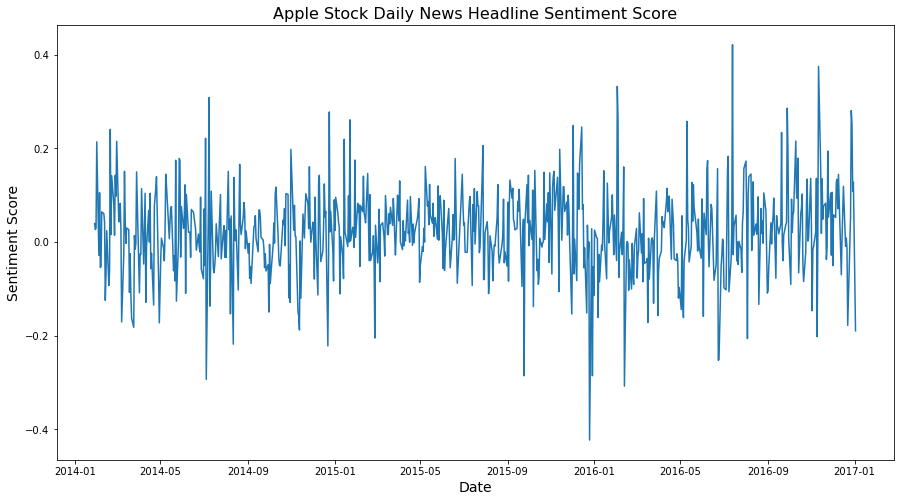

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.plot(apple_daily_sentiment)
plt.title('Apple Stock Daily News Headline Sentiment Score', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14)
plt.show()

In [16]:
# Because of all the above operations, the indices are disturbed, so reseting the index
apple_daily_sentiment.reset_index(inplace=True)

# creating date column
apple_daily_sentiment['Date'] = pd.to_datetime(apple_daily_sentiment['trading_time']).dt.floor('d')

# we don't need time zone information, so removing it
apple_daily_sentiment['Date'] = apple_daily_sentiment['Date'].apply(lambda d: d.replace(tzinfo=None))

# setting date as an index
apple_daily_sentiment.set_index("Date", inplace=True)
apple_daily_sentiment.head()

,trading_time,score
Date,,
2014-01-28,2014-01-28 09:30:00+00:00,0.039278
2014-01-29,2014-01-29 09:30:00+00:00,0.026540
2014-01-30,2014-01-30 09:30:00+00:00,0.029652
2014-01-31,2014-01-31 09:30:00+00:00,0.213817
2014-02-03,2014-02-03 09:30:00+00:00,-0.028657


## 2.4 Store daily sentiment score in CSV file 

In [11]:
apple_daily_sentiment.to_csv('apple_daily_sentiment.csv')